# Decision Trees

## 1. ROC curve

(a) To construct artificial data that resembles the output of a classifier, do the following: Assume two unit normal distributions separated by one standard deviation and produce random samples from each. Transform the resulting samples with the sigmoid function f(x) = 1/(1+exp(−x)) to map them onto the unit interval.

In [47]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def sigmoid_list(X):
    sigmoid_lst = np.zeros(len(X))
    for i in range(len(X)):
        x = X[i]
        sigmoid_lst[i] = 1/(1+np.exp(-x))
    return sigmoid_lst

m1 = 2
sigma1 = 1
m2 = 3
sigma2 = 1
N_sample = 1000

if m2 < m1:
    print('Remember that we want to choose m1 < m2, without loss of generality.')

Gauss1 = np.random.normal(m1, sigma1, N_sample)
Gauss2 = np.random.normal(m2, sigma2, N_sample)

sigmoid_Gauss1 = sigmoid_list(Gauss1)
sigmoid_Gauss2 = sigmoid_list(Gauss2)

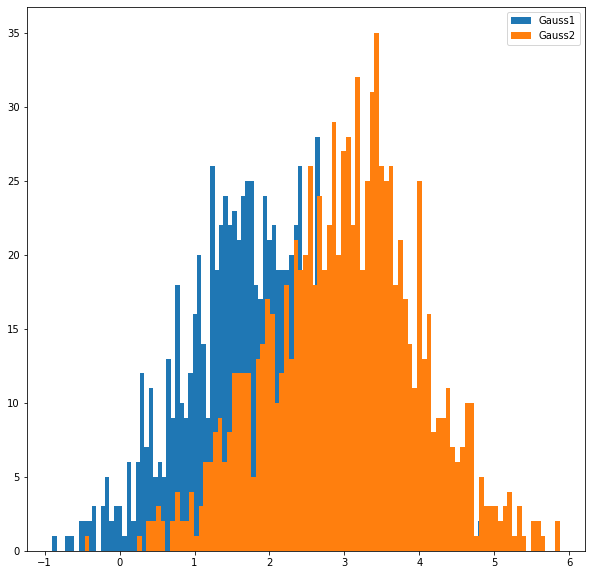

In [49]:
bins = 100

fig = plt.figure(figsize = (10,10))
plt.hist(Gauss1, bins=bins, label='Gauss1')
plt.hist(Gauss2, bins=bins, label='Gauss2')

plt.legend()
plt.show()

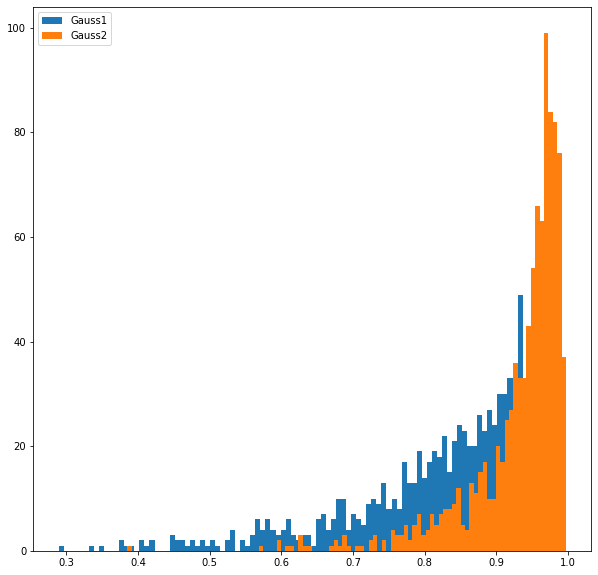

In [50]:
bins = 100

fig = plt.figure(figsize = (10,10))
plt.hist(sigmoid_Gauss1, bins=bins, label='Gauss1')
plt.hist(sigmoid_Gauss2, bins=bins, label='Gauss2')

plt.legend()
plt.show()

(b) Construct ROC curves by calculating TPRs and FPRs for many threshold values, one by one by calculating the TP, FP, TN and FN rates each time.

In [51]:
def diagnostic(X, Y, threshold):
    
    TP = 0
    FN = 0
    TN = 0
    FP = 0
    
    for i in range(len(X)):
        if X[i] <= threshold:
            TP += 1
        else:
            FN += 1
    for j in range(len(Y)):
        if Y[j] > threshold:
            TN += 1
        else:
            FP += 1
    return TP, FN, TN, FP

# Remark: If the thresholds are not restraint to (0, 1), we should choose a larger N_points, such
# that the threshold intervall stays fined splitted.

def ROC_curve(X, Y, N_points=500, thresholds=(0, 1)):
    
    threshold_list = np.linspace(thresholds[0], thresholds[1], N_points)
    TP = np.zeros(len(threshold_list))
    FN = np.zeros(len(threshold_list))
    TN = np.zeros(len(threshold_list))
    FP = np.zeros(len(threshold_list))
    TPR_list = np.zeros(len(threshold_list))
    FPR_list = np.zeros(len(threshold_list))
    for i in range(len(threshold_list)):
        threshold = threshold_list[i]
        TP[i], FN[i], TN[i], FP[i] = diagnostic(X, Y, threshold)
        TPR_list[i] = TP[i]/(TP[i] + FN[i])
        FPR_list[i] = FP[i]/(TN[i] + FP[i])
    return FPR_list, TPR_list
        
    

(0.0, 1.01)

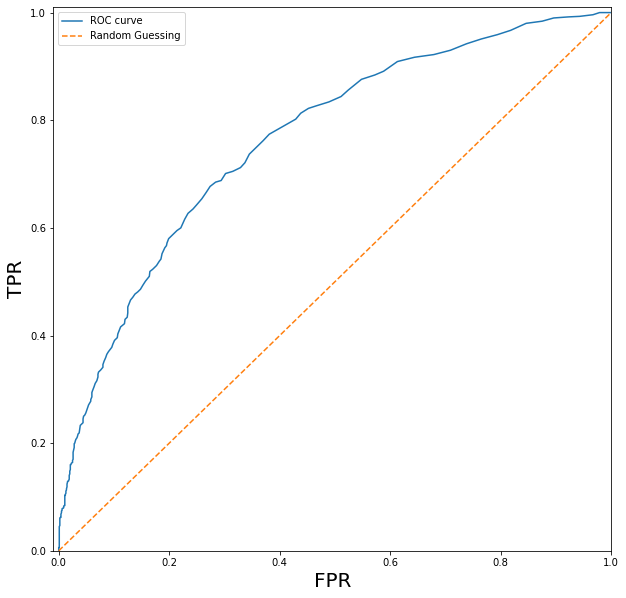

In [52]:
FPR_list, TPR_list = ROC_curve(sigmoid_Gauss1, sigmoid_Gauss2)

fig = plt.figure(figsize = (10,10))
plt.plot(FPR_list, TPR_list, label='ROC curve')
plt.plot(FPR_list, FPR_list, label='Random Guessing', linestyle='dashed')


plt.xlabel('FPR', size = 20)
plt.ylabel('TPR', size = 20)
plt.legend()
plt.xlim([-0.01, 1.])
plt.ylim([0, 1.01])

(0.0, 1.01)

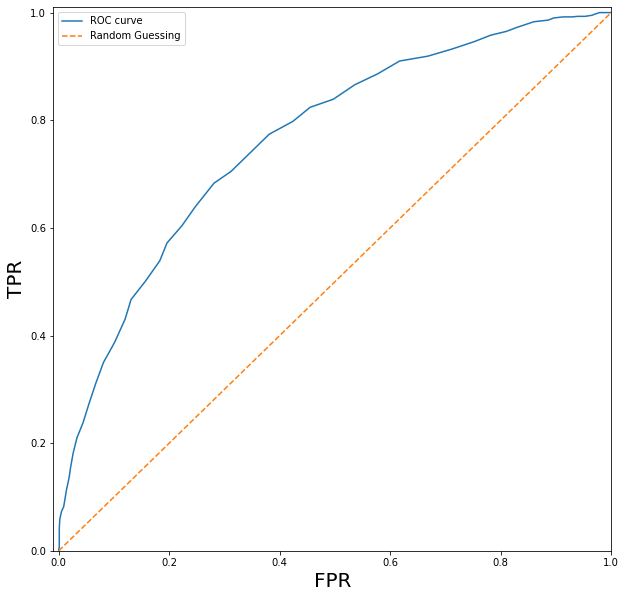

In [53]:
# Let us now plot the original data, before the sigmoid transformation. Of course, here, we need to 
# enlarge the threshold intervall, such that the majority of the data points are included.

FPR_list, TPR_list = ROC_curve(Gauss1, Gauss2, N_points=2000, thresholds=(-100, 100))

fig = plt.figure(figsize = (10,10))
plt.plot(FPR_list, TPR_list, label='ROC curve')
plt.plot(FPR_list, FPR_list, label='Random Guessing', linestyle='dashed')


plt.xlabel('FPR', size = 20)
plt.ylabel('TPR', size = 20)
plt.legend()
plt.xlim([-0.01, 1.])
plt.ylim([0, 1.01])

(c) Integrate the area under the curve as a measure for classification performance. Why is this a good metric?

In [54]:
def AUC(X, Y, N_points=500, thresholds=(0, 1)):
    
    FPR_list, TPR_list = ROC_curve(X, Y, N_points, thresholds)
    
    integral = 0
    
    for i in range(1, len(TPR_list) - 1):
        delta_x = FPR_list[i + 1] - FPR_list[i]
        height1 = TPR_list[i] 
        height2 = TPR_list[i + 1] 
        
        area_base = delta_x*height1
        area_triangle = delta_x*(height2 - height1)/2
        area = area_base + area_triangle
        
        integral += area
        
    return integral

In [55]:
print(AUC(sigmoid_Gauss1, sigmoid_Gauss2))
# In order to define the threshold intervall, I assume that m1 < m2, without loss of generality.
print(AUC(Gauss1, Gauss2, N_points=2000, thresholds=(m1 - 10*sigma1, m2 + 10*sigma2)))

0.7638235000000001
0.7638395000000002


An AUC score of 1 indicates perfect seperation capability, whereas an AUC score of 0 indicates reciprocal behavior - ie. the model always predicts the wrong class. Random guessing produces an AUC score of 0.5, as seen in the plot. The AUC score boils down the seperation capability of a classifier into a single number that is independent of the thresholds. You can read more here: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

## 2. Loss function in the lecture we discced the binary cross-entropy (BCE) loss for classification. Generalize this loss for multi-label classification. 

The "trick" is to treat multi-label classification as a series of binary classification tasks. This is described here: https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451